<a href="https://colab.research.google.com/github/screid/Estadistica_Computacional_UGM/blob/main/Repaso_Unidad1_Estadistica_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importo librería para leer datasets
import pandas as pd

# Importo librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Importo librerías para calculos vectoriales y estadísticos
import numpy as np
import scipy.stats as stats

In [ ]:
dataset = pd.read_csv('vgsales.csv')

In [ ]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 1. EDA (Análisis exploratorio de datos)

Primero hacemos un EDA (Análisis Exploratorio de Datos). Para esto, primero graficaremos. Graficaremos los datos categóricos con un barplot, y los datos numéricos con un histograma. En este caso no analizaremos relaciones de ningún tipo (correlaciones).

In [ ]:
# Hacemos función para crear barplot, tomando como entrada la columna del dataset, nombre del eje x, nombre del eje y y titulo del gráfico
def plot_barplot(dataset, col_name, xlabel, ylabel, title, max_values=None):

  # Contar la frecuencia para cada valor en la columna
  col_counts = dataset[col_name].value_counts()

  # Si se especifica max_values, seleccionar los valores más frecuentes
  if max_values:
    col_counts = col_counts.head(max_values)

  # Crear un barplot
  sns.barplot(x=col_counts.index, y=col_counts.values)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
  plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
  plt.show()

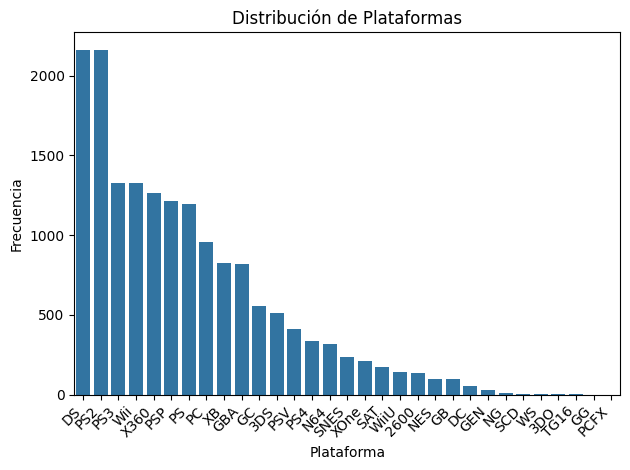

In [ ]:
# Llamamos la función para hacer un gráfico de barras para las columnas Plataforma, Género y Publisher
plot_barplot(dataset, 'Platform', 'Plataforma', 'Frecuencia', 'Distribución de Plataformas')

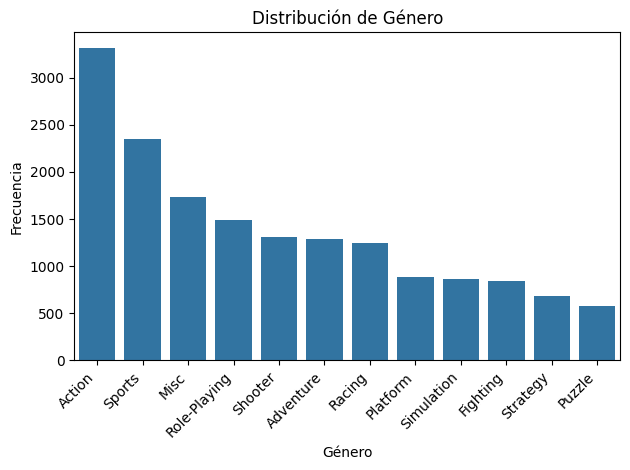

In [ ]:
plot_barplot(dataset, 'Genre', 'Género', 'Frecuencia', 'Distribución de Género')

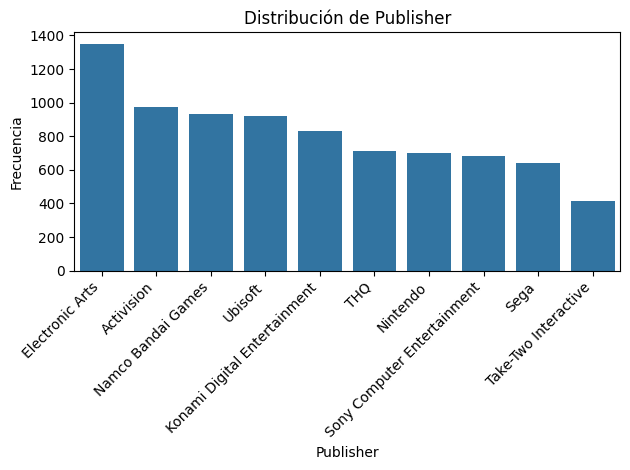

In [ ]:
plot_barplot(dataset, 'Publisher', 'Publisher', 'Frecuencia', 'Distribución de Publisher', 10)

In [ ]:
# Hacemos función para crear un histograma, tomando como entrada la columna del dataset,
# nombre del eje x, nombre del eje y, título del gráfico y número de bins.
def plot_histogram(dataset, col_name, xlabel, ylabel, title, bins):

  # Crear un histograma
  plt.hist(dataset[col_name], bins=bins)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
  plt.show()

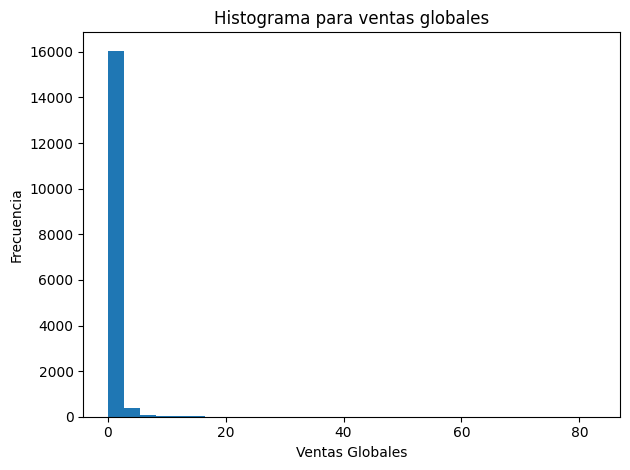

In [ ]:
plot_histogram(dataset, 'Global_Sales', 'Ventas Globales', 'Frecuencia', 'Histograma para ventas globales', 30)

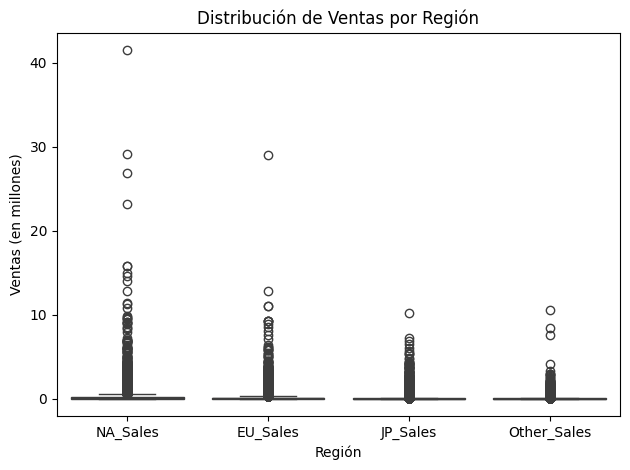

In [ ]:
# Selecciona las columnas deseadas
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_data = dataset[sales_cols]

# Crea el boxplot
sns.boxplot(data=sales_data)

# Personaliza el gráfico
plt.title('Distribución de Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Ventas (en millones)')

# Ajusta el diseño para evitar que las etiquetas se superpongan
plt.tight_layout()

# Muestra el gráfico
plt.show()

# 2. Intervalos de confianza

Primero veremos Intervalos de Confianza (IC) para las variables numéricas. En este caso corresponden a las ventas. Primero calcularemos y visualizaremos los IC para las ventas globales, para después hacer lo mismo para cada tipo de ventas.

**Recordatorio:** NA es la región norteamericana (Estados Unidos, Canada, entre otros), JP es Japón, EU es Europa y Other_Sales son todos los países restantes.

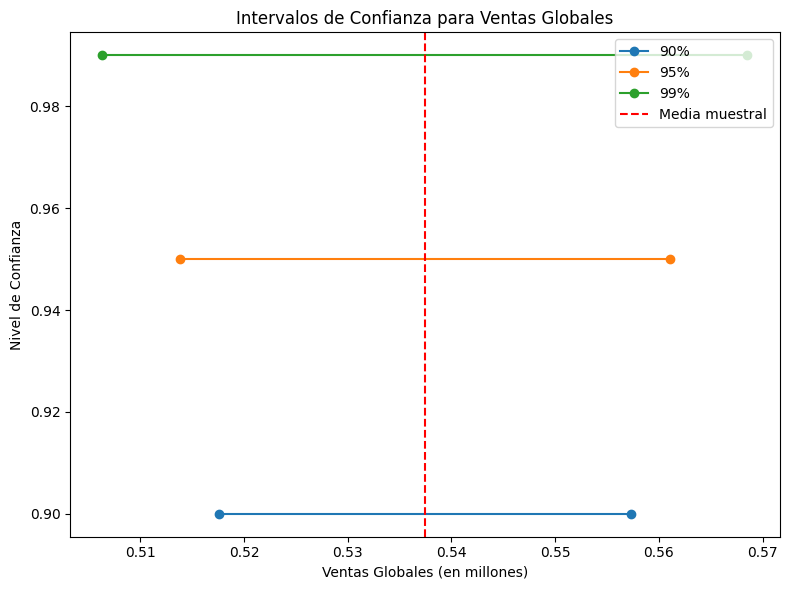

In [ ]:
# Datos y niveles de confianza
datos_ventas_globales = dataset['Global_Sales']
niveles_confianza = [0.90, 0.95, 0.99]

# Calcular media y desviación estándar muestral
media_muestral = np.mean(datos_ventas_globales)
desviacion_muestral = np.std(datos_ventas_globales, ddof=1)
n = len(datos_ventas_globales)

# Crear el gráfico
plt.figure(figsize=(8, 6))

for nivel_confianza in niveles_confianza:
    # Valor crítico t
    t = stats.t.ppf((1 + nivel_confianza) / 2, df=n-1)

    # Margen de error
    margen_error_t = t * (desviacion_muestral / np.sqrt(n))

    # Intervalo de confianza
    IC_min_t = media_muestral - margen_error_t
    IC_max_t = media_muestral + margen_error_t

    # Graficar la línea horizontal
    plt.plot([IC_min_t, IC_max_t], [nivel_confianza, nivel_confianza],
             marker='o', label=f'{nivel_confianza*100:.0f}%')

# Personalizar el gráfico
plt.axvline(media_muestral, color='red', linestyle='--', label='Media muestral')
plt.title('Intervalos de Confianza para Ventas Globales')
plt.xlabel('Ventas Globales (en millones)')
plt.ylabel('Nivel de Confianza')
plt.legend()
plt.tight_layout()
plt.show()

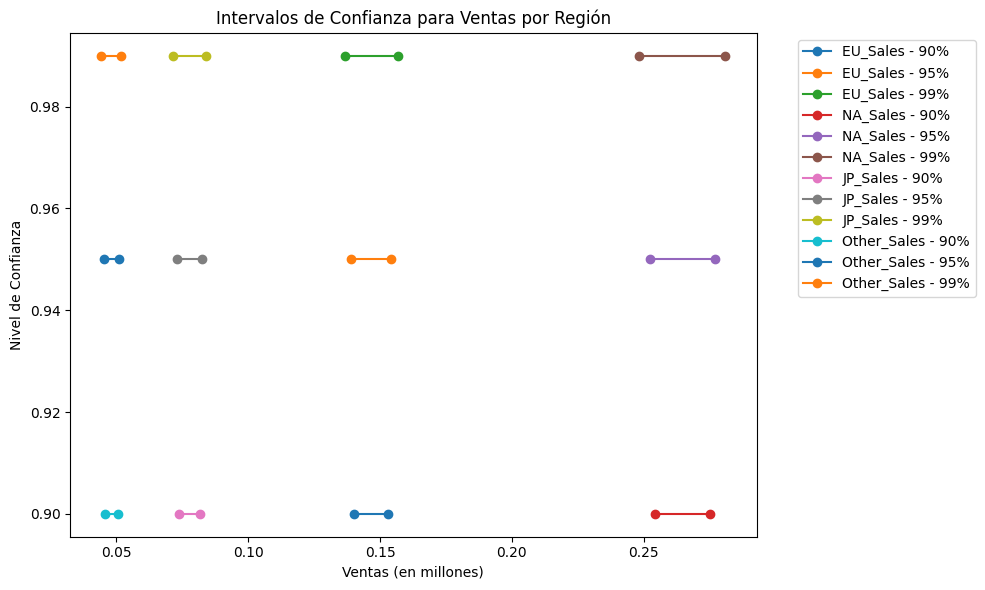

In [ ]:
# Datos y niveles de confianza
niveles_confianza = [0.90, 0.95, 0.99]
sales_cols = ['EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales']

# Crear el gráfico
plt.figure(figsize=(10, 6))

for col in sales_cols:
    datos_ventas = dataset[col]
    media_muestral = np.mean(datos_ventas)
    desviacion_muestral = np.std(datos_ventas, ddof=1)
    n = len(datos_ventas)

    for nivel_confianza in niveles_confianza:
        # Valor crítico t
        t = stats.t.ppf((1 + nivel_confianza) / 2, df=n-1)

        # Margen de error
        margen_error_t = t * (desviacion_muestral / np.sqrt(n))

        # Intervalo de confianza
        IC_min_t = media_muestral - margen_error_t
        IC_max_t = media_muestral + margen_error_t

        # Graficar la línea horizontal
        plt.plot([IC_min_t, IC_max_t], [nivel_confianza, nivel_confianza],
                 marker='o', label=f'{col} - {nivel_confianza*100:.0f}%')

# Personalizar el gráfico
plt.title('Intervalos de Confianza para Ventas por Región')
plt.xlabel('Ventas (en millones)')
plt.ylabel('Nivel de Confianza')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Leyenda fuera del gráfico
plt.tight_layout()
plt.show()

Por lo tanto, las ventas de Norteamérica presentan un mayor IC que el resto.

# 3. Test de hipótesis

En esta sección haremos 2 test de hipótesis. Primero un ANOVA, para ver si hay una diferencia significa entre las ventas de las 4 regiones (NA, EU, JP y Others), y luego 2 con t-estadístico, comparando Others con JP y EU con NA.

In [ ]:
# Test ANOVA
col_NA = dataset['NA_Sales']
col_EU = dataset['EU_Sales']
col_JP = dataset['JP_Sales']
col_Other = dataset['Other_Sales']

f_stat, p_valor_anova = stats.f_oneway(col_NA, col_EU, col_JP, col_Other)
print(f"Estadístico F: {f_stat:.2f}, p-valor: {p_valor_anova:.4f}")

Estadístico F: 583.51, p-valor: 0.0000


Como el p-value es menor a 0.05, se rechaza la hipótesis nula, indicando que sí hay una diferencia significativa entre las muestras. Esto es evidente, ya que como vimos anteriormente, los montos son muy distintos entre regiones. Sin embargo, importante recordar que ANOVA **no menciona cuales son los grupos discordantes**, sino el global.

Ahora, vamos a utilizar la hipótesis t-estadístico para comparar JP vs. Others y EU vs.NA. Ocupamos este estadístico, puesto que **desconocemos la desviación poblacional**.

In [ ]:
# Cálculo de la prueba t para dos muestras independientes (JP vs. Other Sales)
t, p_valor_t = stats.ttest_ind(col_JP, col_Other)

print(f"Estadístico t: {t:.2f}, p-valor: {p_valor_t:.4f}")

Estadístico t: 10.57, p-valor: 0.0000


In [ ]:
# Cálculo de la prueba t para dos muestras independientes (EU vs. NA Sales)
t, p_valor_t = stats.ttest_ind(col_NA, col_EU)

print(f"Estadístico t: {t:.2f}, p-valor: {p_valor_t:.4f}")

Estadístico t: 15.83, p-valor: 0.0000


Como ambos p-values son menores a 0.05, significa que, en ambos casos, había una diferencia significativa entre las muestras que se compararon.

# 4. Probabilidad

En esta sección nos haremos varias preguntas, las cuales responderemos utilizando probabilidad.

## 4.1. Calcular la probabildiad de que un juego del género (Genre) acción (Action) venda más de 10 millones.

$P(\text{Ventas} > 10 \mid \text{Género} = \text{Action}) = \frac{\text{N° de juegos Action con ventas > 10}}{\text{Total de juegos Action}}$


In [ ]:
# Filtrar los datos para el género "Action"
action_games = dataset[dataset['Genre'] == 'Action']

# Calcular la probabilidad de que las ventas globales sean mayores a 10 millones
probabilidad = len(action_games[action_games['Global_Sales'] > 10]) / len(action_games)

print(f"La probabilidad de que un juego del género Action venda más de 20 millones es: {probabilidad*100:.2f}%")

La probabilidad de que un juego del género Action venda más de 20 millones es: 0.27%


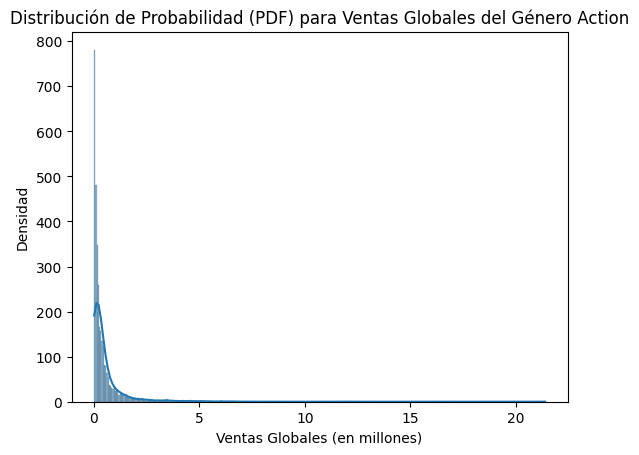

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos para el género "Action"
action_games = dataset[dataset['Genre'] == 'Action']

# Crear el histograma con densidad
sns.histplot(action_games['Global_Sales'], kde=True)

# Personalizar el gráfico
plt.title('Distribución de Probabilidad (PDF) para Ventas Globales del Género Action')
plt.xlabel('Ventas Globales (en millones)')
plt.ylabel('Densidad')

# Mostrar el gráfico
plt.show()

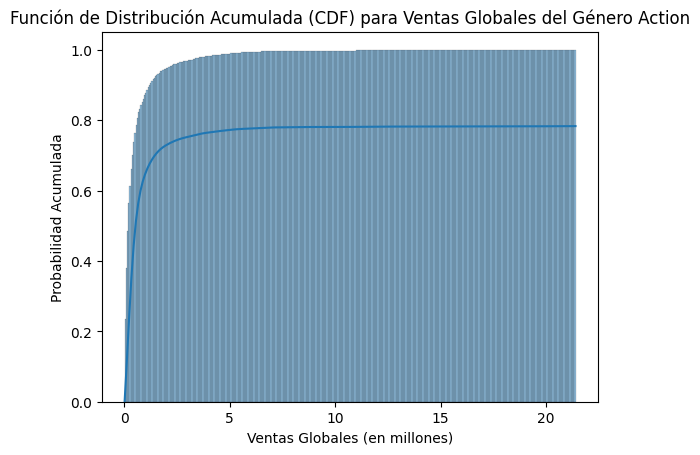

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos para el género "Action"
action_games = dataset[dataset['Genre'] == 'Action']

# Crear el histograma acumulativo
sns.histplot(action_games['Global_Sales'], cumulative=True, stat="density", kde=True)

# Personalizar el gráfico
plt.title('Función de Distribución Acumulada (CDF) para Ventas Globales del Género Action')
plt.xlabel('Ventas Globales (en millones)')
plt.ylabel('Probabilidad Acumulada')

# Mostrar el gráfico
plt.show()

Mediante estos 2 tipos de gráficos, podemos entender cómo se distribuyen estas ventas, es decir, qué valores son más probables y cómo se acumula la probabilidad. Aquí es donde entran en juego el PDF y el CDF.

**PDF (Función de Densidad de Probabilidad):**

* ¿Qué muestra? El PDF muestra la probabilidad relativa de que una variable aleatoria (en este caso, las ventas globales) tome un valor específico.
* Analogía: Piensa en el PDF como un histograma suavizado. Muestra la frecuencia de cada valor, pero en lugar de barras, utiliza una curva continua.
* Interpretación: La altura de la curva en un punto dado representa la densidad de probabilidad en ese valor. Valores más altos en la curva indican una mayor probabilidad.
* Ejemplo: En el PDF de las ventas de videojuegos de acción, un pico alto en la zona de 1 millón de copias vendidas indicaría que muchos juegos de acción venden alrededor de esa cantidad.

**CDF (Función de Distribución Acumulada):**

* ¿Qué muestra? El CDF muestra la probabilidad acumulada de que una variable aleatoria tome un valor menor o igual a un valor dado.
* Analogía: Piensa en el CDF como una escalera. Cada escalón representa la probabilidad acumulada hasta ese punto.
* Interpretación: El valor del CDF en un punto dado representa la probabilidad de que la variable aleatoria sea menor o igual a ese valor.
* Ejemplo: En el CDF de las ventas de videojuegos de acción, si el valor del CDF en 2 millones es 0.8, significa que hay un 80% de probabilidad de que un juego de acción venda 2 millones de copias o menos.

## 4.2. ¿Cuál es la probabilidad de que un juego publicado por Nintendo pertenezca al género Sports?

$P(\text{Género} = \text{Sports} \mid \text{Publisher} = \text{Nintendo}) = \frac{\text{Juegos Sports publicados por Nintendo}}{\text{Total de juegos publicados por Nintendo}}
$

In [ ]:
# Filtrar los datos para que sean de Nintendo (Publisher Nintendo)
nintendo_games = dataset[dataset['Publisher'] == 'Nintendo']

# Calcular la probabilidad
probabilidad = len(nintendo_games[nintendo_games['Genre'] == 'Sports']) / len(nintendo_games)

print(f"La probabilidad de que un juego publicado por Nintendo pertenezca al gnéro Sports es: {probabilidad*100:.2f}%")

La probabilidad de que un juego publicado por Nintendo pertenezca al gnéro Sports es: 7.82%


## 4.3. ¿Cuál es la probabilidad de que un juego con más de 30 millones de ventas globales sea de la plataforma Wii?

$P(\text{Plataforma} = \text{Wii} \mid \text{Ventas Globales} > 30) = \frac{\text{Juegos Wii con ventas globales > 30}}{\text{Total de juegos con ventas globales > 30}}$

In [ ]:
# Filtrar los datos para que sean de Nintendo (Publisher Nintendo)
vg_glsales_more_than_30 = dataset[dataset['Global_Sales'] > 30]

# Calcular la probabilidad
probabilidad = len(vg_glsales_more_than_30[vg_glsales_more_than_30['Platform'] == 'Wii']) / len(vg_glsales_more_than_30)

print(f"La probabilidad de que un juego con más de 30 millones de ventas globales sea de la plataforma Wii es: {probabilidad*100:.2f}%")

La probabilidad de que un juego con más de 30 millones de ventas globales sea de la plataforma Wii es: 42.86%


## 4.4. ¿Cuál es la probabilidad de que un juego sea de Nintendo y haya vendido más de 20 millones en Norteamérica?

$P(\text{Publisher} = \text{Nintendo} \cap \text{NA_Sales} > 20) = \frac{\text{Juegos de Nintendo con ventas en NA > 20}}{\text{Total de juegos}}$


In [ ]:
# Calcular la cantidad de juegos que cumplen ambas condiciones
nintendo_na_ventas_altas = dataset[(dataset['Publisher'] == 'Nintendo') & (dataset['NA_Sales'] > 20)]

# Calcular la probabilidad respecto al total del dataset
probabilidad = len(nintendo_na_ventas_altas) / len(dataset)

print(f"La probabilidad de que un juego sea de Nintendo y tenga más de 20 millones de ventas en Norteamérica es: {probabilidad*100:.2f}%")

La probabilidad de que un juego sea de Nintendo y tenga más de 20 millones de ventas en Norteamérica es: 0.02%


## 4.5. Dado que un juego tiene ventas en Japón mayores a 5 millones, ¿cuál es la probabilidad de que sea del género Role-Playing y publicado antes del año 2000?

$P(\text{Género} = \text{Role-Playing} \cap \text{Año} < 2000 \mid \text{JP\_Sales} > 5) = \frac{\text{Juegos Role-Playing, año < 2000 y JP_Sales > 5}}{\text{Total de juegos con JP\_Sales > 5}}
$

In [ ]:
# Filtrar solo los juegos con ventas en Japón mayores a 5 millones
juegos_japon = dataset[dataset['JP_Sales'] > 5]

# Calcular cuántos de esos son Role-Playing y anteriores al año 2000
rpg_antes_2000 = juegos_japon[(juegos_japon['Genre'] == 'Role-Playing') & (juegos_japon['Year'] < 2000)]

# Calcular la probabilidad condicional
probabilidad = len(rpg_antes_2000) / len(juegos_japon)

print(f"La probabilidad de que un juego con ventas en Japón mayores a 5 millones sea Role-Playing y publicado antes del 2000 es: {probabilidad*100:.2f}%")

La probabilidad de que un juego con ventas en Japón mayores a 5 millones sea Role-Playing y publicado antes del 2000 es: 22.22%
